<a href="https://colab.research.google.com/github/AimjGuytidy/pytorch-on/blob/main/ml_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple ML Algo for Classification

### Implementing a perceptron learning algorithm

In [1]:
import numpy as np

In [2]:
class Perceptron:
  def __init__(self,lr=0.01,n_iter = 50,random_state = 1):
    self.lr = lr
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0,scale = 0.01,size=X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi,target in zip(X,y):
        update = self.lr*(target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def n_input(self,X):
    return np.dot(X,self.w_) + self.b_
  def predict(self,X):
    return np.where(self.n_input(X) >= 0.0,1,0)

### Training a perceptron model on the Iris dataset

The perceptron model we created is a binary classifier model!! however it can be extended to a One versus All method!!

In [3]:
import os
import pandas as pd

In [4]:
url = "https://archive.ics.uci.edu/ml/machine"\
      "-learning-databases/iris/iris.data"
print("From URL:",url)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [5]:
df = pd.read_csv(url,header=None,encoding = "utf-8")
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

In [12]:
import matplotlib.pyplot as plt

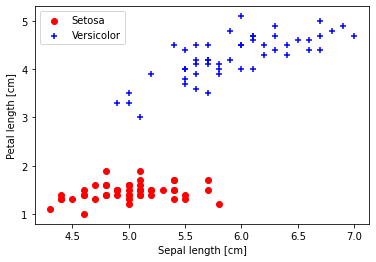

In [14]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[:100,4].values
y = np.where(y=="Iris-setosa",0,1)
plt.scatter(X[:50,0],X[:50,1],color="red",marker = "o",
            label = "Setosa")
plt.scatter(X[50:100,0],X[50:100,1],color = "blue",
            marker = "+",label = "Versicolor")
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc=0)
plt.show()